In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('bmh')
%matplotlib inline
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv('adult.csv')
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [50]:
data.shape

(48842, 15)

In [51]:
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [52]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [53]:
data.head()

age  workclass     education  gender  hours-per-week         occupation  \
0   25    Private          11th    Male              40  Machine-op-inspct   
1   38    Private       HS-grad    Male              50    Farming-fishing   
2   28  Local-gov    Assoc-acdm    Male              40    Protective-serv   
3   44    Private  Some-college    Male              40  Machine-op-inspct   
4   18          ?  Some-college  Female              30                  ?   

  income  
0  <=50K  
1  <=50K  
2   >50K  
3   >50K  
4  <=50K

In [54]:
data.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [55]:
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [56]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [57]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [58]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'gender_Female', 'gender_Male', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service',

In [59]:
data_dummies.head()

age  hours-per-week  workclass_?  workclass_Federal-gov  \
0   25              40            0                      0   
1   38              50            0                      0   
2   28              40            0                      0   
3   44              40            0                      0   
4   18              30            1                      0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  1   
1                    0                       0                  1   
2                    1                       0                  0   
3                    0                       0                  1   
4                    0                       0                  0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    0   
1                       0                           0                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

      ...       occupation_Machine-op-inspct  occupation_Other-service  \
0     ...                                  1                         0   
1     ...                                  0                         0   
2     ...                                  0                         0   
3     ...                                  1                         0   
4     ...                                  0                         0   

   occupation_Priv-house-serv  occupation_Prof-specialty  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 0                        0   
2                           1                 0                        0   
3                           0                 0                        0   
4                           0                 0                        0   

   occupation_Transport-moving  income_<=50K  income_>50K  
0                            0             1            0  
1                            0             1            0  
2                            0             0            1  
3                            0             0            1  
4                            0             1            0  

[5 rows x 46 columns]

In [90]:
features = data_dummies.ix[:, 'age':'occupation_Transport-moving']
features.head()

age  hours-per-week  workclass_?  workclass_Federal-gov  \
0   25              40            0                      0   
1   38              50            0                      0   
2   28              40            0                      0   
3   44              40            0                      0   
4   18              30            1                      0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  1   
1                    0                       0                  1   
2                    1                       0                  0   
3                    0                       0                  1   
4                    0                       0                  0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    0   
1                       0                           0                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

              ...               occupation_Farming-fishing  \
0             ...                                        0   
1             ...                                        1   
2             ...                                        0   
3             ...                                        0   
4             ...                                        0   

   occupation_Handlers-cleaners  occupation_Machine-op-inspct  \
0                             0                             1   
1                             0                             0   
2                             0                             0   
3                             0                             1   
4                             0                             0   

   occupation_Other-service  occupation_Priv-house-serv  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                          0                           0                 0   
1                          0                           0                 0   
2                          0                           1                 0   
3                          0                           0                 0   
4                          0                           0                 0   

   occupation_Tech-support  occupation_Transport-moving  
0                        0                            0  
1                        0                            0  
2                        0                            0  
3                        0                            0  
4                        0                            0  

[5 rows x 44 columns]

In [61]:
X = features.values
y = data_dummies['income_>50K'].values

In [62]:
X.shape

(48842, 44)

In [63]:
y.shape

(48842,)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logreg.score(X_test, y_test)

0.80771435590860696

# Numbers Can Encode Categoricals

In [66]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

In [67]:
demo_df

Categorical Feature  Integer Feature
0               socks                0
1                 fox                1
2               socks                2
3                 box                1

In [68]:
pd.get_dummies(demo_df)

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

##### Using get_dummies will only encode the string feature and will not change the integer feature

In [69]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

##### To creat dummy variables  for the “Integer Feature” columns, we should explicitly list the columns we want to encode using the columns parameter. Then,both features will be treated as categorical.

# Automatic Feature Selection

# Univariate Statistics

* In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target. 
* Then the features that are related with the highest confidence are selected. 
* In the case of classification, this is also known as analysis of variance (ANOVA). 
* A key property of these tests is that they are univariate, meaning that they only consider each feature individually. 
* Consequently, a feature will be discarded if it is only informative when combined with another feature.

In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [71]:
cancer = load_breast_cancer()

In [72]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [74]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x7fc97c2767b8>)

In [75]:
X_train_selected = select.transform(X_train)

In [76]:
X_train.shape

(284, 80)

In [77]:
X_train_selected.shape

(284, 40)

##### The number of features was reduced from 80 to 40 (50 percent of the original number of features)

* We can find out which features have been selected using the get_support method, which returns a Boolean mask of the selected features

In [78]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False], dtype=bool)

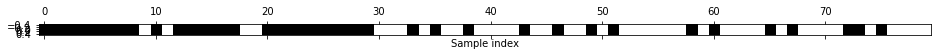

In [79]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


##### Removing the noise features improved the performance.

# Model-Based Feature Selection

* Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. 
* The supervised
model that is used for feature selection doesn’t need to be the same model that is used
for the final supervised modeling. 
* The feature selection model needs to provide some
measure of importance for each feature, so that they can be ranked by this measure.
* In contrast to univariate selection, model-based
selection considers all features at once, and so can capture interactions (if the model
can capture them). 
* To use model-based feature selection, we need to use the SelectFromModel transformer:

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

In [83]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


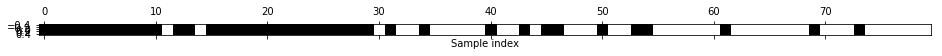

In [84]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [85]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


# Iterative Feature Selection

* In univariate testing we used no model, while in model-based selection we used a single model to select features. 
* In iterative feature selection, a series of models are built,with varying numbers of features. 
* There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or
starting with all features and removing features one by one until some stopping criterion is reached.
* One particular method of this kind is recursive feature elimination (RFE), which starts with all features, builds a model, and discards the least important feature according to the model

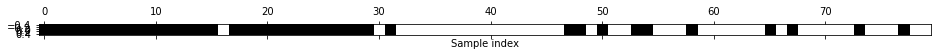

In [86]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [87]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [88]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


* Here, the performance of the random forest used inside the RFE is the same as that
achieved by training a logistic regression model on top of the selected features. 
* In other words, once we’ve selected the right features, the linear model performs as well
as the random forest.